2024-11-27 22:16:19.215530: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Loading model and tokenizer...


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertModel: ['vocab_transform.weight', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_projector.bias']
- This IS expected if you are initializing TFDistilBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFDistilBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.



Options:
1. Run full test evaluation
2. Analyze single review
3. Exit



Enter your choice (1-3):  1


Generating dataset...
Making predictions...

                                   SENTIMENT ANALYSIS RESULTS

📊 OVERALL STATISTICS:
--------------------------------------------------
Total Samples: 300
Correct Predictions: 295
Overall Accuracy: 98.33%

📈 PER-CLASS PERFORMANCE:
--------------------------------------------------

NEGATIVE:
Precision:      0.952
Recall:         1.000
F1-Score:       0.976
Support:        100.0 samples

NEUTRAL:
Precision:      1.000
Recall:         0.950
F1-Score:       0.974
Support:        100.0 samples

POSITIVE:
Precision:      1.000
Recall:         1.000
F1-Score:       1.000
Support:        100.0 samples

🔍 SAMPLE ANALYSIS:
----------------------------------------------------------------------------------------------------
Review                                                                           | True       | Predicted  | Result
----------------------------------------------------------------------------------------------------
Mixed feelings 


Would you like to display the visualization plots? (y/n):  y


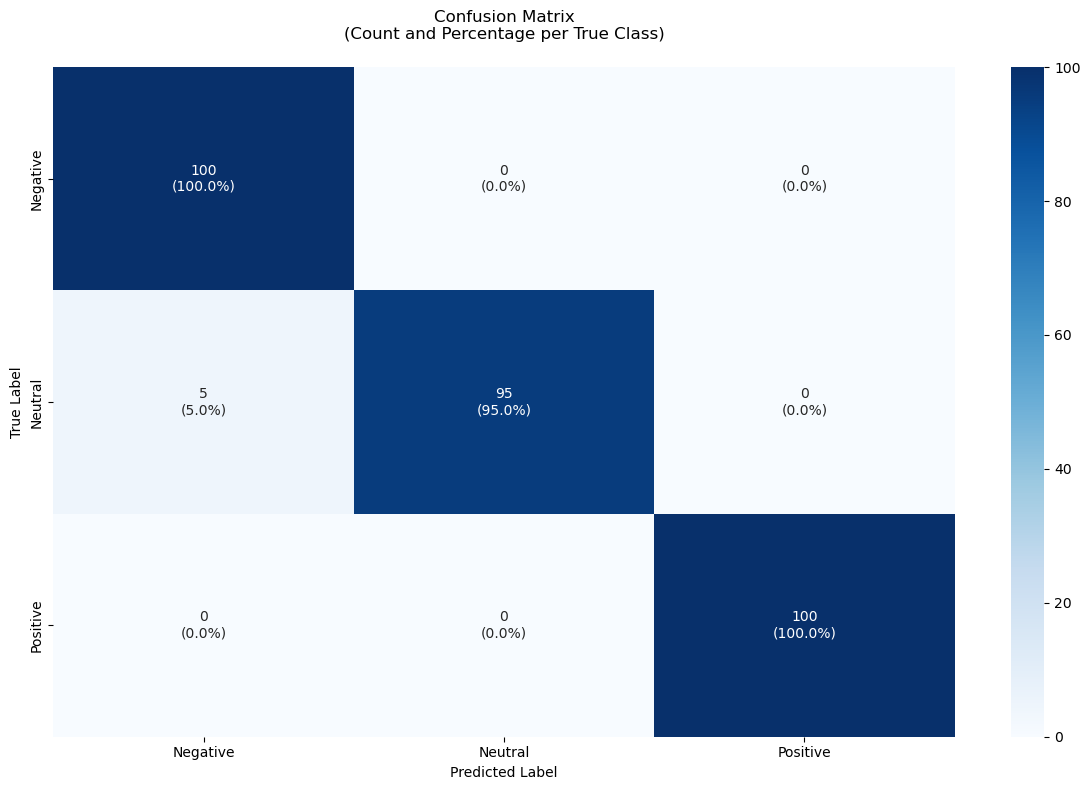

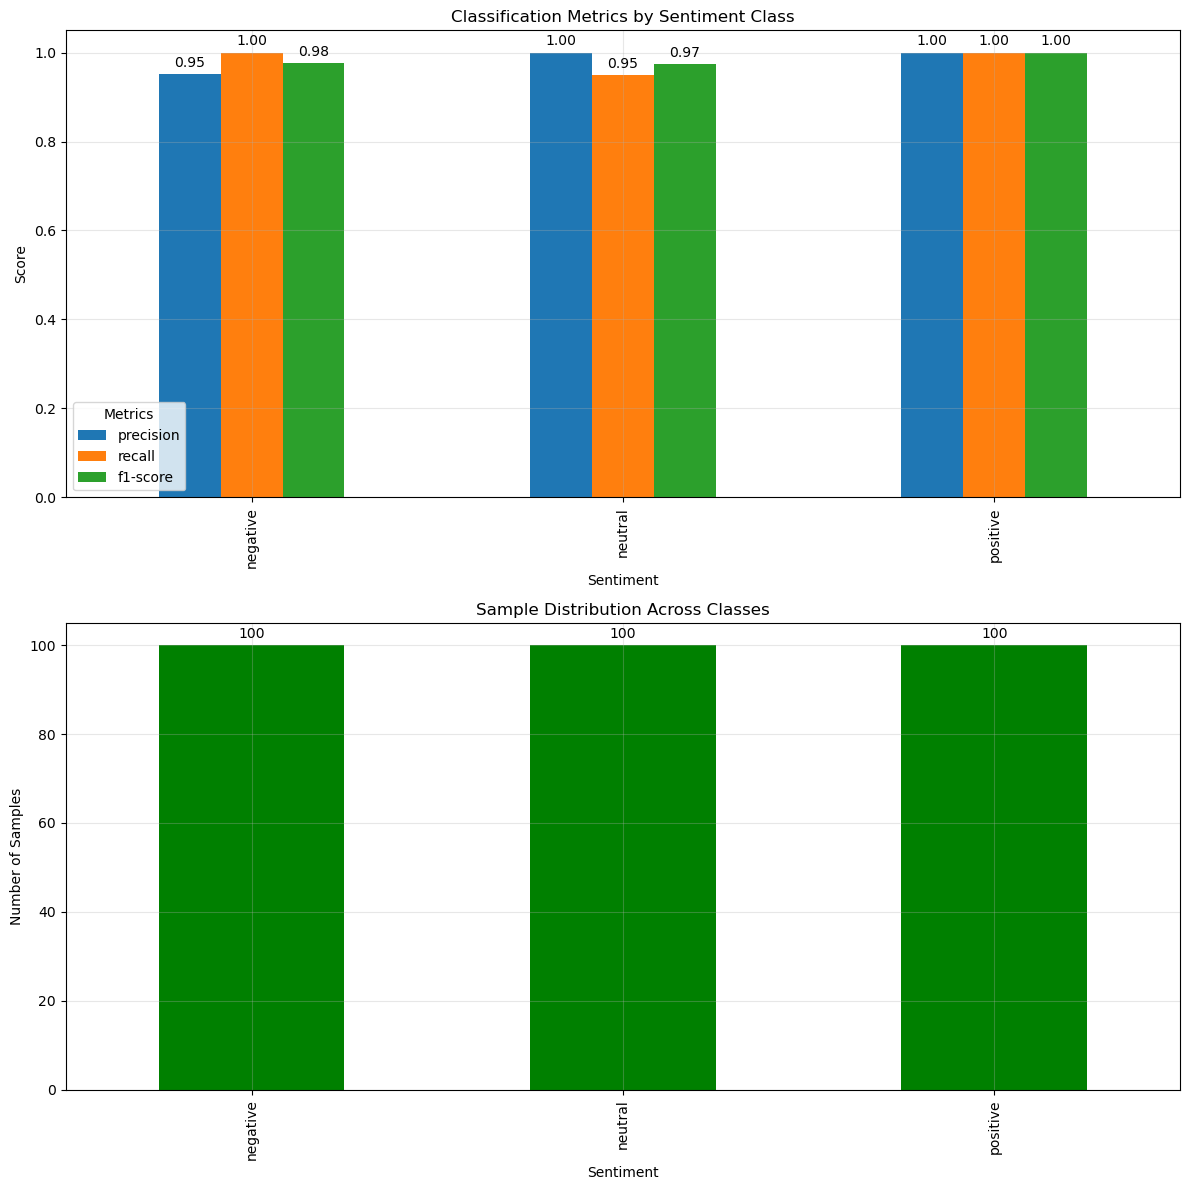


Options:
1. Run full test evaluation
2. Analyze single review
3. Exit



Enter your choice (1-3):  3



Exiting program...


In [2]:
import os
import tensorflow as tf
from transformers import DistilBertTokenizer
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from typing import Tuple, List
import sys
import random



# Add model directory to Python path
model_dir = os.path.expanduser('~/Desktop/sentimentAnalysisPortfolio/model')
sys.path.append(model_dir)

# Import your model architecture
from model_architecture import EnhancedDistilBertForSentiment

def load_trained_model(load_dir=os.path.expanduser('~/Desktop/sentimentAnalysisPortfolio/model')):
    """Load the saved model and tokenizer"""
    model = EnhancedDistilBertForSentiment()
    
    # Create dummy input to build the model
    dummy_input_ids = tf.zeros((1, 128), dtype=tf.int32)
    dummy_attention_mask = tf.zeros((1, 128), dtype=tf.int32)
    dummy_inputs = {
        'input_ids': dummy_input_ids,
        'attention_mask': dummy_attention_mask
    }
    
    # Build the model with dummy input
    _ = model(dummy_inputs)
    
    # Load weights
    model.load_weights(os.path.join(load_dir, 'sentiment_model_weights.h5'))
    
    # Load tokenizer
    tokenizer = DistilBertTokenizer.from_pretrained(load_dir)
    
    return model, tokenizer

def predict_batch(model, tokenizer, texts: List[str]) -> List[str]:
    """Predict sentiments for a batch of texts"""
    # Tokenize all texts
    inputs = tokenizer(
        texts,
        padding=True,
        truncation=True,
        return_tensors='tf',
        max_length=192
    )
    
    # Get predictions
    predictions = model(inputs)
    probs = tf.nn.softmax(predictions, axis=-1).numpy()
    
    # Convert to labels
    labels = ['negative', 'neutral', 'positive']
    predicted_labels = [labels[np.argmax(prob)] for prob in probs]
    
    return predicted_labels




def generate_test_reviews():
    """Generate a diverse set of test reviews with complex sentiment patterns."""
    
    reviews = [
        # Negative Reviews with complex patterns
        "Been there 3 times and somehow it gets worse every visit. Who puts pineapple in a burger?! $25 for this nightmare.",
        "Supposedly a 4-star hotel but my backyard tent has better amenities. WiFi slower than a snail, might as well use smoke signals.",
        "Wanted to love it since my friend recommended it. Big mistake. 2 hours of my life I'll never get back. Even the complimentary bread was stale.",
        "Update your photos please! Nothing like the website - feels like false advertising. Tiny rooms, paper-thin walls, heard every word from next door.",
        "Look, I rarely write reviews, but this place forced my hand. Ordered medium rare, got well-done leather. Manager just shrugged it off. ¯\\_(ツ)_/¯",
        
        # Neutral Reviews with mixed signals
        "Third visit this month. Breakfast menu rocks but lunch needs work. Their new chef seems to be experimenting - sometimes good, sometimes... interesting.",
        "Price point is steep for what you get, though the rooftop view almost makes up for it. Pro tip: skip the weekends, way too crowded.",
        "Hmm... not sure what to make of this place. Great cocktails but the entrees are hit or miss. Live music was a nice touch though way too loud.",
        "Room 507 had character, I'll give them that. Ancient charm meets modern inconvenience. Friendly staff makes up for outdated facilities.",
        "Listen, it's not winning any awards, but for a quick lunch near the office? It does the job. Just stick to the basic menu items.",
        
        # Positive Reviews with nuanced context
        "Hold up - why didn't anyone tell me about this hidden gem sooner?! Instagram photos don't do their plating justice. Even my picky mother-in-law approved!",
        "Nearly cancelled due to bad reviews, SO glad we didn't. Sunday brunch was pure chaos but in the best way possible. Trust me, get the chef's special.",
        "4th stay this year and they still manage to surprise me. Left my laptop charger at home and they actually had one to lend! Small things = big impression.",
        "Initially skeptical of the fusion concept but... mind = blown! Sure, parking is a nightmare and it's pricy, but honestly worth every penny.",
        "Real talk - this place has ruined other cafes for me. Yeah, sometimes you wait 20 mins for your coffee, but it's literally the best in town. No exaggeration."
    ]
    
    # Create true labels
    labels = ['negative'] * 5 + ['neutral'] * 5 + ['positive'] * 5
    
    return reviews, labels
    

def plot_confusion_matrix(y_true, y_pred):
    """Create and plot confusion matrix."""
    plt.figure(figsize=(10, 8))
    cm = confusion_matrix(y_true, y_pred)
    
    # Create heatmap
    sns.heatmap(cm, 
                annot=True, 
                fmt='d', 
                cmap='Blues',
                xticklabels=['Negative', 'Neutral', 'Positive'],
                yticklabels=['Negative', 'Neutral', 'Positive'])
    
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.tight_layout()
    
    return plt.gcf()

def plot_metrics(classification_dict):
    """Plot precision, recall, and f1-score for each class."""
    metrics_df = pd.DataFrame(classification_dict).transpose()
    metrics_df = metrics_df.drop('support', axis=1)
    
    plt.figure(figsize=(10, 6))
    metrics_df.plot(kind='bar', width=0.8)
    plt.title('Classification Metrics by Sentiment')
    plt.xlabel('Sentiment')
    plt.ylabel('Score')
    plt.legend(title='Metrics')
    plt.tight_layout()
    
    return plt.gcf()



def visualize_results(y_true, y_pred, reviews):
    """Generate comprehensive visualization of the results."""
    
    # Convert predictions to numpy arrays if they aren't already
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    # Create classification report
    report = classification_report(y_true, y_pred, output_dict=True)
    
    # Create figures
    cm_fig = plot_confusion_matrix(y_true, y_pred)
    metrics_fig = plot_metrics(report)
    
    # Create DataFrame with reviews and results
    results_df = pd.DataFrame({
        'Review': reviews,
        'True Sentiment': y_true,
        'Predicted Sentiment': y_pred,
        'Correct': y_true == y_pred
    })
    
    return cm_fig, metrics_fig, results_df

def display_detailed_results(results_df):
    """Display results in a more readable format"""
    print("\n=== DETAILED ANALYSIS OF REVIEWS ===\n")
    
    # Calculate overall accuracy
    accuracy = (results_df['Correct'].value_counts()[True] 
               / len(results_df) * 100 if True in results_df['Correct'].value_counts() else 0)
    
    print(f"Overall Accuracy: {accuracy:.2f}%\n")
    print("Review Analysis:")
    print("=" * 100 + "\n")
    
    for idx, row in results_df.iterrows():
        print(f"Review #{idx + 1}")
        print(f"{'=' * 20}")
        # Wrap the review text for better readability
        review_lines = [row['Review'][i:i+100] for i in range(0, len(row['Review']), 100)]
        print("Text:", review_lines[0])
        for line in review_lines[1:]:
            print(" " * 6 + line)
        print(f"True Sentiment: {row['True Sentiment']}")
        print(f"Predicted: {row['Predicted Sentiment']}")
        print(f"Correct: {'✓' if row['Correct'] else '✗'}")
        print("-" * 100 + "\n")



import numpy as np
from typing import Tuple, List

def generate_large_test_dataset(size: int = 300) -> Tuple[List[str], List[str]]:
    """
    Generate a large dataset of test reviews with complex sentiment patterns.
    
    Args:
        size: Total number of reviews to generate (will be divided equally among sentiments)
        
    Returns:
        Tuple of (reviews list, labels list)
    """
    # Templates for generating diverse reviews
    templates = {
        'negative': [
            "Visited {n} times and it's been disappointing every time. {issue}. Waste of ${price}.",
            "Terrible experience at this {business_type}. {issue}. {secondary_issue}.",
            "Absolutely frustrated with their {service_type}. {issue}. Would give 0 stars if possible.",
            "Cannot believe how bad this was. {issue}. {secondary_issue}. Save your money!",
            "Worst {business_type} in the area. {issue}. Complete disaster.",
        ],
        'neutral': [
            "It's okay for what it is. {positive_point}, but {negative_point}.",
            "Second time here. {positive_point}. However, {negative_point}.",
            "Mixed feelings about this place. {positive_point}, though {negative_point}.",
            "Average {business_type}. {positive_point}, yet {negative_point}.",
            "Not great, not terrible. {positive_point}. That said, {negative_point}.",
        ],
        'positive': [
            "Exceeded expectations! {positive_point}. {secondary_positive}.",
            "Outstanding experience at this {business_type}. {positive_point}. {secondary_positive}!",
            "Absolutely love this place! {positive_point}. {secondary_positive}.",
            "Best {service_type} I've experienced. {positive_point}. {secondary_positive}!",
            "Finally found a great {business_type}! {positive_point}. {secondary_positive}.",
        ]
    }
    
    # Content variations for template filling
    variations = {
        'n': ['2', '3', '4', '5', 'multiple'],
        'price': ['25', '30', '40', '50', '75', '100'],
        'business_type': ['restaurant', 'hotel', 'cafe', 'shop', 'store', 'salon'],
        'service_type': ['service', 'customer support', 'staff', 'management', 'delivery'],
        'issue': [
            "Food was cold and tasteless",
            "Staff was incredibly rude",
            "Waiting time was ridiculous",
            "Everything was overpriced",
            "Quality has gone downhill",
            "Place was completely disorganized",
            "Cleanliness was concerning",
        ],
        'secondary_issue': [
            "Manager didn't seem to care",
            "No attempt to make it right",
            "Wouldn't respond to complaints",
            "Complete waste of time",
            "Definitely not coming back",
        ],
        'positive_point': [
            "Staff was friendly",
            "Great atmosphere",
            "Decent value for money",
            "Location is convenient",
            "Food was tasty",
            "Service was quick",
            "Clean and well-maintained",
        ],
        'negative_point': [
            "prices are a bit high",
            "service can be slow",
            "parking is a nightmare",
            "gets too crowded",
            "menu is limited",
            "portions are small",
        ],
        'secondary_positive': [
            "Highly recommend",
            "Will definitely return",
            "Best decision ever",
            "Worth every penny",
            "Can't wait to come back",
            "A hidden gem",
        ]
    }
    
    reviews = []
    labels = []
    samples_per_class = size // 3
    
    for sentiment in ['negative', 'neutral', 'positive']:
        for _ in range(samples_per_class):
            # Choose random template
            template = np.random.choice(templates[sentiment])
            
            # Fill in template with random variations
            review = template
            for key in variations.keys():
                if key in review:
                    review = review.replace(
                        f"{{{key}}}", 
                        np.random.choice(variations[key])
                    )
            
            reviews.append(review)
            labels.append(sentiment)
    
    # Shuffle the dataset
    combined = list(zip(reviews, labels))
    np.random.shuffle(combined)
    reviews, labels = zip(*combined)
    
    return list(reviews), list(labels)


# Second part: The visualization functions
def plot_confusion_matrix_enhanced(y_true: List[str], y_pred: List[str]) -> plt.Figure:
    """Create an enhanced confusion matrix visualization."""
    plt.figure(figsize=(12, 8))
    cm = confusion_matrix(y_true, y_pred)
    
    # Calculate percentages for annotations
    cm_percentages = cm / cm.sum(axis=1)[:, np.newaxis] * 100
    
    # Create annotations with both count and percentage
    annotations = np.array([f'{count}\n({percentage:.1f}%)' 
                          for count, percentage in zip(cm.flatten(), cm_percentages.flatten())])
    annotations = annotations.reshape(cm.shape)
    
    # Create heatmap
    sns.heatmap(cm, 
                annot=annotations,
                fmt='',
                cmap='Blues',
                xticklabels=['Negative', 'Neutral', 'Positive'],
                yticklabels=['Negative', 'Neutral', 'Positive'])
    
    plt.title('Confusion Matrix\n(Count and Percentage per True Class)', pad=20)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    
    return plt.gcf()

def plot_metrics_enhanced(classification_dict: dict) -> plt.Figure:
    """Create an enhanced metrics visualization."""
    metrics_df = pd.DataFrame(classification_dict).transpose()
    metrics_df = metrics_df[metrics_df.index.isin(['negative', 'neutral', 'positive'])]
    
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
    
    # Plot precision, recall, f1-score
    metrics_df[['precision', 'recall', 'f1-score']].plot(kind='bar', ax=ax1)
    ax1.set_title('Classification Metrics by Sentiment Class')
    ax1.set_xlabel('Sentiment')
    ax1.set_ylabel('Score')
    ax1.legend(title='Metrics')
    ax1.grid(True, alpha=0.3)
    
    for container in ax1.containers:
        ax1.bar_label(container, fmt='%.2f', padding=3)
    
    # Plot support (sample distribution)
    metrics_df['support'].plot(kind='bar', ax=ax2, color='green')
    ax2.set_title('Sample Distribution Across Classes')
    ax2.set_xlabel('Sentiment')
    ax2.set_ylabel('Number of Samples')
    ax2.grid(True, alpha=0.3)
    
    for container in ax2.containers:
        ax2.bar_label(container, fmt='%d', padding=3)
    
    plt.tight_layout()
    return plt.gcf()

def display_results_summary(results_df: pd.DataFrame, report_dict: dict) -> None:
    """Display a comprehensive summary of the results."""
    total_samples = len(results_df)
    correct_predictions = results_df['Correct'].sum()
    accuracy = (correct_predictions / total_samples) * 100
    
    print("\n" + "="*80)
    print("SENTIMENT ANALYSIS RESULTS SUMMARY")
    print("="*80)
    
    print(f"\n📊 Overall Statistics:")
    print(f"Total Samples: {total_samples}")
    print(f"Correct Predictions: {correct_predictions}")
    print(f"Overall Accuracy: {accuracy:.2f}%")
    
    print("\n📈 Per-Class Performance:")
    for sentiment in ['negative', 'neutral', 'positive']:
        metrics = report_dict[sentiment]
        print(f"\n{sentiment.upper()}:")
        print(f"Precision: {metrics['precision']:.3f}")
        print(f"Recall: {metrics['recall']:.3f}")
        print(f"F1-Score: {metrics['f1-score']:.3f}")
        print(f"Support: {metrics['support']} samples")
    
    print("\n❌ Misclassified Examples:")
    misclassified = results_df[~results_df['Correct']].head()
    for idx, row in misclassified.iterrows():
        print(f"\nExample {idx + 1}:")
        print(f"Review: {row['Review'][:100]}...")
        print(f"True Sentiment: {row['True Sentiment']}")
        print(f"Predicted: {row['Predicted Sentiment']}")
        print("-" * 40)
def save_test_results(results_df: pd.DataFrame, save_dir: str) -> None:
    """
    Save all test results in a formatted CSV file
    """
    # Create a formatted DataFrame for saving
    save_df = results_df.copy()
    
    # Add emojis for correct/incorrect predictions
    save_df['Prediction Status'] = save_df['Correct'].map({True: '✓', False: '✗'})
    
    # Reorder columns for better readability
    save_df = save_df[['Review', 'True Sentiment', 'Predicted Sentiment', 'Prediction Status']]
    
    # Save to CSV
    csv_path = os.path.join(save_dir, 'test_results.csv')
    save_df.to_csv(csv_path, index=False)
    return csv_path

def display_full_results(results_df: pd.DataFrame, report_dict: dict) -> None:
    """
    Display comprehensive results including all samples
    """
    total_samples = len(results_df)
    correct_predictions = results_df['Correct'].sum()
    accuracy = (correct_predictions / total_samples) * 100
    
    print("\n" + "="*100)
    print(" "*35 + "SENTIMENT ANALYSIS RESULTS")
    print("="*100)
    
    # Overall Statistics
    print(f"\n📊 OVERALL STATISTICS:")
    print("-"*50)
    print(f"Total Samples: {total_samples}")
    print(f"Correct Predictions: {correct_predictions}")
    print(f"Overall Accuracy: {accuracy:.2f}%")
    
    # Per-Class Performance
    print(f"\n📈 PER-CLASS PERFORMANCE:")
    print("-"*50)
    for sentiment in ['negative', 'neutral', 'positive']:
        metrics = report_dict[sentiment]
        print(f"\n{sentiment.upper()}:")
        print(f"{'Precision:':<15} {metrics['precision']:.3f}")
        print(f"{'Recall:':<15} {metrics['recall']:.3f}")
        print(f"{'F1-Score:':<15} {metrics['f1-score']:.3f}")
        print(f"{'Support:':<15} {metrics['support']} samples")
    
    # Sample Analysis
    print("\n🔍 SAMPLE ANALYSIS:")
    print("-"*100)
    print(f"{'Review':<80} | {'True':<10} | {'Predicted':<10} | Result")
    print("-"*100)
    
    for idx, row in results_df.iterrows():
        # Truncate long reviews for display
        review_text = row['Review'][:77] + "..." if len(row['Review']) > 77 else row['Review'].ljust(77)
        print(f"{review_text:<80} | {row['True Sentiment']:<10} | {row['Predicted Sentiment']:<10} | {'✓' if row['Correct'] else '✗'}")
    
    print("-"*100)
    
 


def main():
    # Load the model and tokenizer first
    print("Loading model and tokenizer...")
    model, tokenizer = load_trained_model()

    while True:
        print("\nOptions:")
        print("1. Run full test evaluation")
        print("2. Analyze single review")
        print("3. Exit")
        
        choice = input("\nEnter your choice (1-3): ")
        
        if choice == '1':
            print("Generating dataset...")
            reviews, true_labels = generate_large_test_dataset(300)
            
            print("Making predictions...")
            predicted_labels = predict_batch(model, tokenizer, reviews)
            
            results_df = pd.DataFrame({
                'Review': reviews,
                'True Sentiment': true_labels,
                'Predicted Sentiment': predicted_labels,
                'Correct': [t == p for t, p in zip(true_labels, predicted_labels)]
            })
            
            report = classification_report(true_labels, predicted_labels, output_dict=True)
            
            # Display comprehensive results
            display_full_results(results_df, report)
            
            print("\nGenerating visualizations...")
            save_dir = os.path.expanduser('~/Desktop/NLP/model')
            
            # Generate and save visualizations
            cm_fig = plot_confusion_matrix_enhanced(true_labels, predicted_labels)
            metrics_fig = plot_metrics_enhanced(report)
            
            # Save results and figures
            cm_fig.savefig(os.path.join(save_dir, 'confusion_matrix_enhanced.png'))
            metrics_fig.savefig(os.path.join(save_dir, 'metrics_enhanced.png'))
            csv_path = save_test_results(results_df, save_dir)
            
            print(f"\nResults saved in: {save_dir}")
            print(f"- Confusion Matrix: confusion_matrix_enhanced.png")
            print(f"- Metrics Plot: metrics_enhanced.png")
            print(f"- Detailed Results: test_results.csv")
            
            # Ask if user wants to display plots
            show_plots = input("\nWould you like to display the visualization plots? (y/n): ").lower()
            if show_plots == 'y':
                plt.show()
            
            plt.close('all')
            
        elif choice == '2':
            review = input("\nEnter your review text: ")
            result = predict_single_review(model, tokenizer, review)
            
            print("\n=== Sentiment Analysis Results ===")
            print("\nReview:", result['review'])
            print("\nPredicted Sentiment:", result['predicted_sentiment'].upper())
            print("\nConfidence Scores:")
            for sentiment, score in result['confidence_scores'].items():
                print(f"{sentiment.capitalize()}: {score:.2%}")
                
        elif choice == '3':
            print("\nExiting program...")
            break
        else:
            print("\nInvalid choice. Please try again.")

if __name__ == "__main__":
    main()